In [1]:
import sys
sys.path.append("../")
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch
from lora_diffusion import tune_lora_scale, patch_pipe
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import torch
torch.cuda.set_device(3)

model_id = "stabilityai/stable-diffusion-2-1-base"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
# pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/home/zhangyp/anaconda3/envs/diff_exp/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [2]:
patch_pipe(
    pipe,
    "./output_dreambooth/text_reg_1.0/checkpoint/lora_weight_e7_s2600.pt",
    patch_text=True,
    patch_ti=False,
    patch_unet=True,
)

LoRA : Patching Unet
LoRA : Patching text encoder


  0%|          | 0/50 [00:00<?, ?it/s]

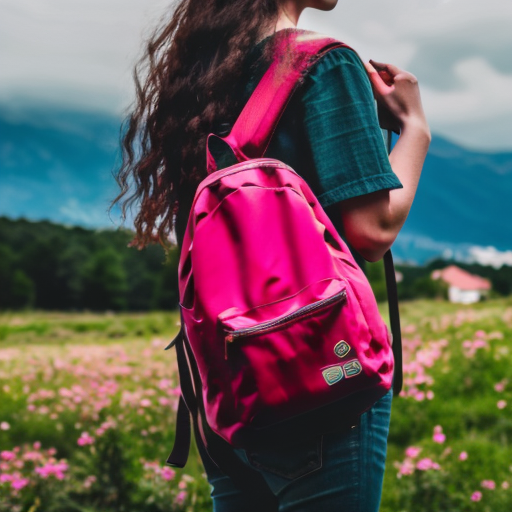

In [5]:
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
prompt = "a <s1>|<s2> backpack in the flowers"
tune_lora_scale(pipe.unet, 1.0)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.0).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

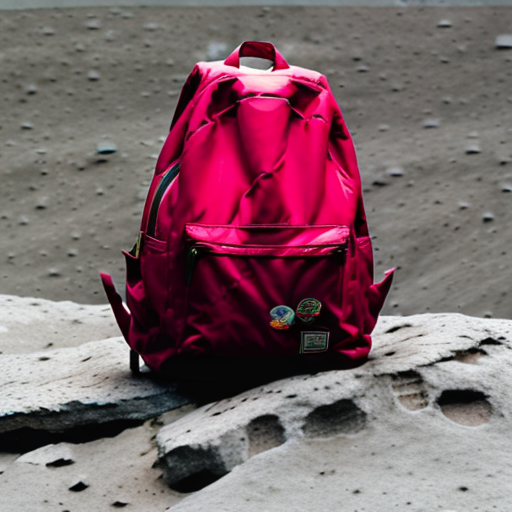

In [4]:
prompt = "a <s1>|<s2> backpack on the moon"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.0).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

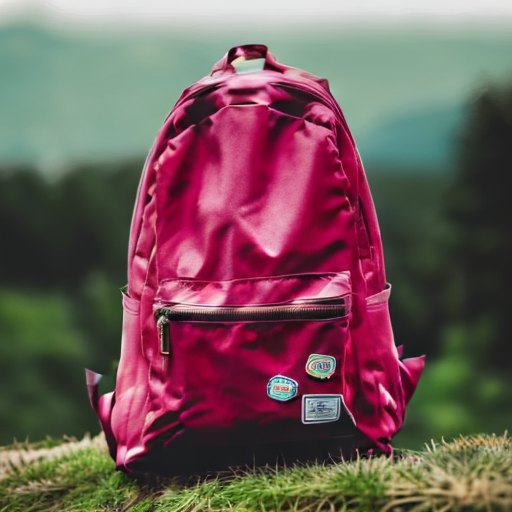

In [24]:
prompt = "a <s1>|<s2> backpack on the grass"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.0).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

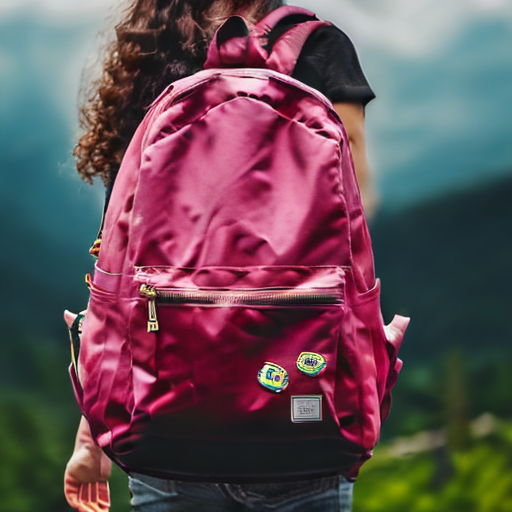

In [25]:
prompt = "a <s1>|<s2> backpack in the flowers"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.0).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

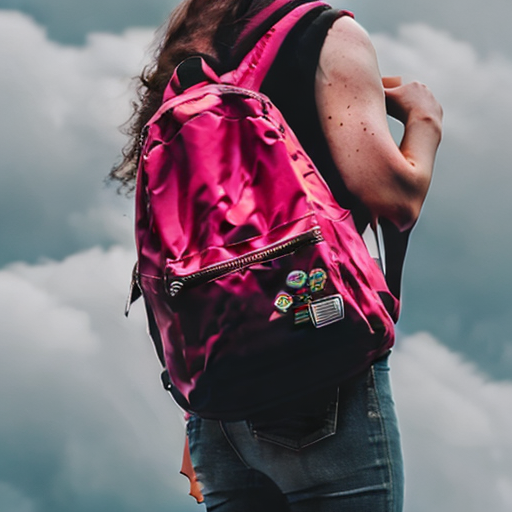

In [26]:
prompt = "a <s1>|<s2> backpack on the moon"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.0).images[0]
image